## Mention your Name and ID in the blanks below
## Name - Ritvik Mittal
## ID - 2021A8PS2545P

# **Graded question 1**

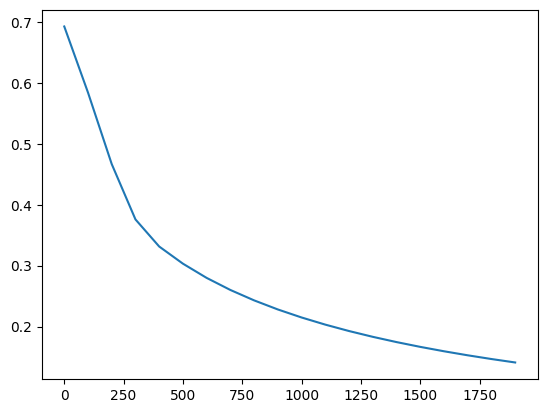

In [ ]:
# Graded Question
# Plot the cost function vs number of iterations using pyplot (plt) from matplotlib
plt.plot([i for i in range(0,2000,100)], d['costs'])

# **Graded question 2**

In [ ]:
# Graded Question
# Find Precision, Recall and F1 score for both the train and test predictions
def calculate_metrics(y_true, y_pred):
    TP = FP = FN = TN = 0

    for i in range(0, len(y_pred)-1):
        true = y_true[i]
        pred = y_pred[i]
        if true == 1 and pred == 1:
            TP += 1
        elif true == 0 and pred == 1:
            FP += 1
        elif true == 1 and pred == 0:
            FN += 1
        elif true == 0 and pred == 0:
            TN += 1

    if (TP + FP) == 0:
        precision = 0
    else:
        precision = TP / (TP + FP)

    if (TP + FN) == 0:
        recall = 0
    else:
        recall = TP / (TP + FN)

    if (precision + recall) == 0:
        f1_score = 0
    else:
        f1_score = 2 * (precision * recall) / (precision + recall)

    return precision, recall, f1_score

pred_test_y = d['Y_prediction_test'].flatten()
pred_test_y = [int(round(pred)) for pred in pred_test_y]

precision_test, recall_test, f1_score_test = calculate_metrics(test_y.flatten(), pred_test_y)
print(precision_test,recall_test,f1_score_test)

pred_train_y = d['Y_prediction_train'].flatten()
pred_train_y = [int(round(pred)) for pred in pred_train_y]

precision_train, recall_train, f1_score_train = calculate_metrics(train_y.flatten(), pred_train_y)
print(precision_train,recall_train,f1_score_train)

0.8214285714285714 0.696969696969697 0.7540983606557378
0.9861111111111112 0.9861111111111112 0.9861111111111112


# **Graded questions 3 and 4**


Evaluative Component:
3. Create a train/test split from the dataset (#GRADED)

4. Evaluate the testing split and it's accuracy (#GRADED)

In [91]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train , y_test = train_test_split(t_indep, t_dep, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

torch.Size([712, 12])
torch.Size([179, 12])
torch.Size([712, 1])
torch.Size([179, 1])


In [94]:
import torch
import torch.nn.functional as F

def init_coeffs(n_coeff, n_hidden=60):
    layer1 = (torch.rand(n_coeff, n_hidden) - 0.5) / n_hidden
    layer2 = torch.rand(n_hidden, 1) - 0.3
    const = torch.rand(1)[0]
    return layer1.requires_grad_(), layer2.requires_grad_(), const.requires_grad_()

def preds(coeffs, indeps):
    layer1, layer2, const = coeffs
    res = F.relu(indeps @ layer1)
    res = res @ layer2 + const
    return torch.sigmoid(res)

def calc_loss(coeffs, indeps, deps):
    return torch.abs(preds(coeffs, indeps) - deps).mean()

def update_coeffs(coeffs, lr=0.1):
    for layer in coeffs:
        layer.sub_(layer.grad * lr)
        layer.grad.zero_()

def one_epoch(coeffs, indeps, deps, lr):
    loss = calc_loss(coeffs, indeps, deps)
    loss.backward()
    with torch.no_grad():
        update_coeffs(coeffs, lr)
    # print(f"Loss: {loss.item():.3f}", end="; ")

def train_model(X_train, y_train, epochs=300, lr=0.1, n_hidden=60):
    torch.manual_seed(442)
    n_coeff = X_train.size(1)
    coeffs = init_coeffs(n_coeff, n_hidden=n_hidden)
    for i in range(epochs):
        one_epoch(coeffs, X_train, y_train, lr=lr)
    return coeffs

coeffs = train_model(X_train, y_train, epochs=300, lr=0.01, n_hidden=60)

with torch.no_grad():
    predictions = preds(coeffs, X_test).squeeze()

    predicted_labels = (predictions > 0.5).float()
    accuracy = (predicted_labels == y_test.squeeze()).float().mean()
    print(accuracy)


tensor(0.6369)
